<a href="https://colab.research.google.com/github/ztjohnson23/MAT494/blob/main/hw_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import matplotlib.pyplot as plt

1.3.2 Least-squares Problems

In [123]:
# Create random matrices A,b

np.random.seed(40)
m = np.random.randint(2,5)
n = np.random.randint(m+1,7)

A = np.random.randint(-4,9,[n,m])
print('A\n',A)

b = np.random.randint(-2,11,[n,1])
print('\nb\n',b)

A
 [[ 3  1  4  4]
 [-2 -3  8  3]
 [-2 -1  6  3]
 [-1  7  7  5]
 [-4 -3  1  5]
 [ 4  0  8  0]]

b
 [[6]
 [8]
 [8]
 [4]
 [1]
 [9]]


To demonstrate the least-squares problem, A is an overdetermined matrix so that it is not invertible and the system cannot be solved using the matrix inverse.

In [149]:
# Least-squares solution using QR decomposition
q,r = np.linalg.qr(A)
x = np.linalg.inv(r)@np.matrix.transpose(q)@b

# Print results
print('Least squares solution x\n',x)

print('\nLeast squares approximation b\n',A@x,'\n\nActual value b\n',b)

print('\n Mean squared error between b and bhat\n',mse(b,A@x))

#print('\nnumpy built-in least squares solution x\n',np.linalg.lstsq(A,b,rcond=0)[0])

Least squares solution x
 [[ 0.43067719]
 [-0.43220104]
 [ 0.96580751]
 [ 0.21790721]]

Least squares approximation b
 [[5.59468943]
 [8.81543049]
 [6.01941338]
 [4.39410418]
 [1.62923795]
 [9.44916886]] 

Actual value b
 [[6]
 [8]
 [8]
 [4]
 [1]
 [9]]

 Mean squared error between b and bhat
 0.9174896765252766


In this case, our least-squares approximation of the solution x is fairly close to the true value of x, as plugging xhat back into our system of equations Ax=b results in a matrix bhat that is close to the expected matrix b with a decent mean squared error.

In [150]:
def run_ls(num_its):
  error_list = []
  for _ in range(num_its):
    m = np.random.randint(2,5)
    n = np.random.randint(m+1,7)
    A = np.random.randint(-4,9,[n,m])
    b = np.random.randint(-2,11,[n,1])

    q,r = np.linalg.qr(A)
    x = np.linalg.inv(r)@np.matrix.transpose(q)@b

    b_hat = A@x
    error = mse(b,b_hat)
    error_list.append(error)
  return[error_list,np.mean(error_list),max(error_list),min(error_list)]

In [152]:
# Analyze error over many iterations
errors,mean_err,max_err,min_err = run_ls(500)
print(f'Average error is: {round(mean_err,4)}, max error is: {round(max_err,4)}, min error is: {round(min_err,4)}')

Average error is: 9.8561, max error is: 61.8953, min error is: 0.0


I tracked the accuracy of least-square approximations over 500 random overdetermined systems Ax=b in order to analyze the general trustworthiness of the least-squares method. As shown by the min error, the least-squares method is capable of providing accurate results, or even the exact solution of x. However, the maximum and average error values suggest that using least-squares may not reliably produce accurate predictions. Obviously, this depends heavily on the characteristics of the matrices A and b in the system, but results suggest that least-squares is not a highly accurate method of approximating systems of linear equations.

1.3.3 Linear Regression

In [175]:
# Create data
np.random.seed(00)
A = np.ones([4,2])
x = np.random.randint(-4,13,4)
A[:,1] = x
print('A\n',A)
y = np.random.randint(-4,13,[4,1])
print('y\n',y)

A
 [[ 1.  8.]
 [ 1. 11.]
 [ 1. -4.]
 [ 1. -1.]]
y
 [[-1]
 [ 3]
 [ 5]
 [ 0]]


Coefficients
 [[ 2.19607843]
 [-0.12745098]] 



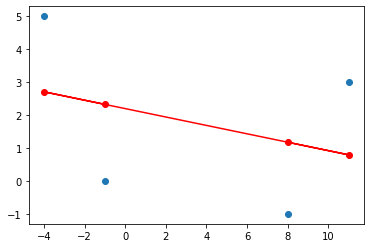

In [193]:
# Solve using least-squares
q,r = np.linalg.qr(A)
C = np.linalg.inv(r)@np.matrix.transpose(q)@y

print('Coefficients\n',C,'\n')

# Plot results
plt.scatter(x,y)
yhat = C[0] + C[1]*x
plt.plot(x,yhat,c='red',linestyle='-',marker='o')
plt.show()

On a simple system, we can quickly use least-squares to calculate the coefficients for a linear regression model. While a linear fit is clearly not right for this data, we have demonstrated how least-squares can be used for creating a linear regression.